In [2]:
import os
import pandas as pd

# Change the folder_path to the directory containing your PDB files.
folder_path = 'databases/ecoli'  # Modify this path

results = []

for file in os.listdir(folder_path):
    if file.endswith('.pdb'):
        pdb_path = os.path.join(folder_path, file)
        length = 0
        plddt_values = []
        
        with open(pdb_path, 'r') as f:
            for line in f:
                # Select only ATOM records for the alpha carbon (CA)
                if line.startswith("ATOM") and " CA " in line[12:16]:
                    length += 1
                    try:
                        # pLDDT is stored in the B-factor field (columns 61-66)
                        plddt = float(line[60:66].strip())
                        plddt_values.append(plddt)
                    except ValueError:
                        print(f"Could not parse pLDDT for {file}")
        
        # Calculate the average pLDDT if any values were found
        avg_plddt = sum(plddt_values) / length if length > 0 else None
        results.append({
            "protein_filename": file,
            "length": length,
            "avg_plddt": avg_plddt
        })

# Create a DataFrame and save the results to a CSV file in the same folder.
df = pd.DataFrame(results)

# Set output file to a full path, for example:
output_path = 'ecoli_vs_scerevisiae_plddt/ecoli_proteome_plddt.csv'

# Save the dataframe to that CSV file
df.to_csv(output_path, index=False)
print("CSV file saved to:", output_path)

CSV file saved to: ecoli_vs_scerevisiae_plddt/ecoli_proteome_plddt.csv


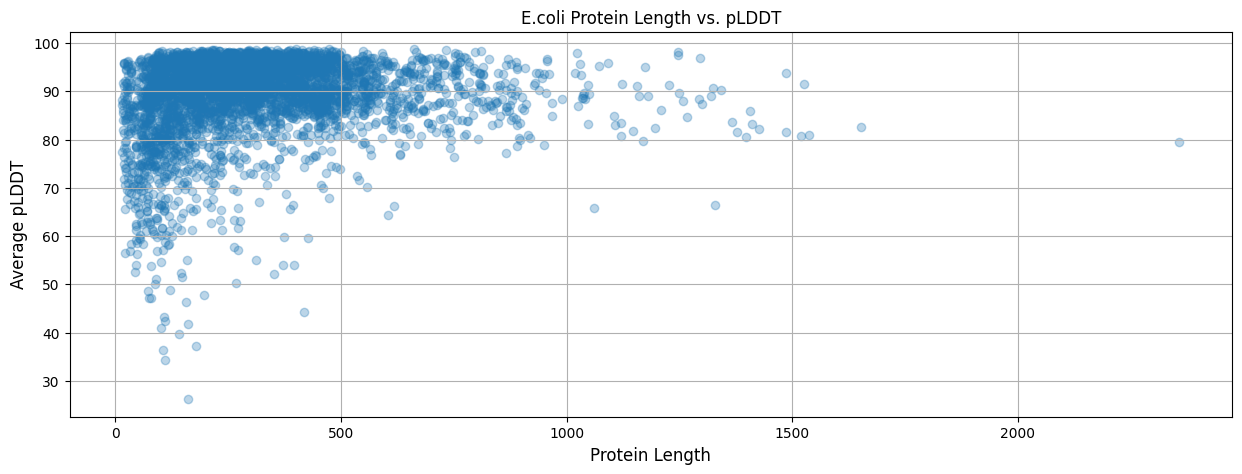

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Adjust the CSV path if necessary.
csv_file = 'ecoli_vs_scerevisiae_plddt/ecoli_proteome_plddt.csv'
df = pd.read_csv(csv_file)

# Create a scatter plot
plt.figure(figsize=(15, 5))
plt.scatter(df['length'], df['avg_plddt'], alpha=0.3)
plt.xlabel("Protein Length", fontsize = 12)
plt.ylabel("Average pLDDT", fontsize = 12)
plt.title("E.coli Protein Length vs. pLDDT")
plt.grid(True)
plt.show()

This script processes a directory of Protein Data Bank (PDB) files to analyze protein structures. For each PDB file, it calculates the protein length (number of unique residues) and the average pLDDT (predicted Local Distance Difference Test, stored in the B-factor field of the PDB file). It then visualizes the results in a scatter plot of protein length versus average pLDDT, which is saved to a specified file.

Input: pdb_dir = r'D:\Research\Part 1 - Comparison\Scerevisiae\dataset'
Output: r'D:\Research\Graph Output\protein_length_vs_plddt_S.Scerevisiae.png'

In [12]:
import os
import pandas as pd

# Change the folder_path to the directory containing your PDB files.
folder_path = 'databases/scerevisiae'  # Modify this path

results = []

for file in os.listdir(folder_path):
    if file.endswith('.pdb'):
        pdb_path = os.path.join(folder_path, file)
        length = 0
        plddt_values = []
        
        with open(pdb_path, 'r') as f:
            for line in f:
                # Select only ATOM records for the alpha carbon (CA)
                if line.startswith("ATOM") and " CA " in line[12:16]:
                    length += 1
                    try:
                        # pLDDT is stored in the B-factor field (columns 61-66)
                        plddt = float(line[60:66].strip())
                        plddt_values.append(plddt)
                    except ValueError:
                        print(f"Could not parse pLDDT for {file}")
        
        # Calculate the average pLDDT if any values were found
        avg_plddt = sum(plddt_values) / length if length > 0 else None
        results.append({
            "protein_filename": file,
            "length": length,
            "avg_plddt": avg_plddt
        })

# Create a DataFrame and save the results to a CSV file in the same folder.
df = pd.DataFrame(results)

# Set output file to a full path, for example:
output_path = 'ecoli_vs_scerevisiae_plddt/scerevisiae_proteome_plddt.csv'

# Save the dataframe to that CSV file
df.to_csv(output_path, index=False)
print("CSV file saved to:", output_path)

CSV file saved to: ecoli_vs_scerevisiae_plddt/scerevisiae_proteome_plddt.csv


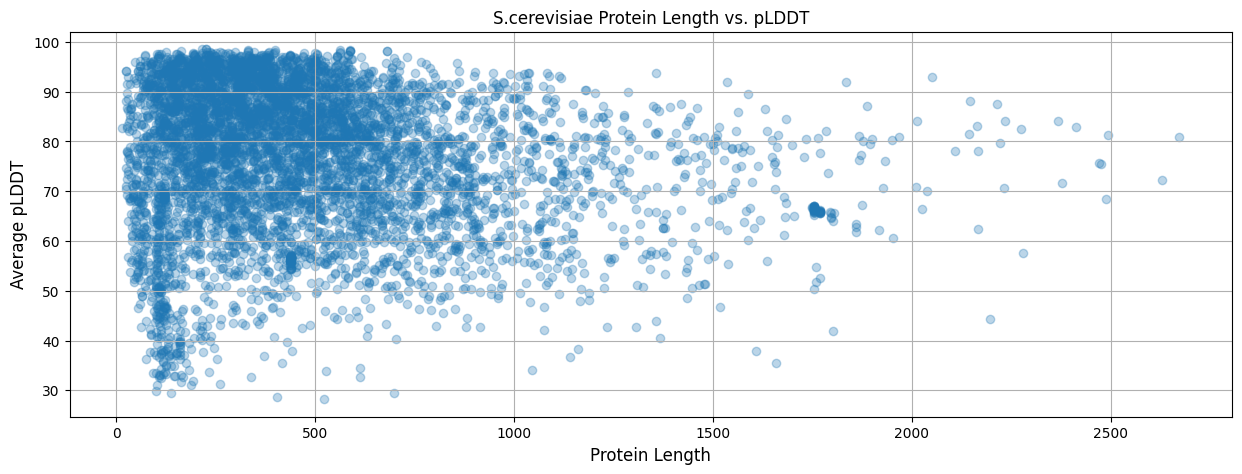

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Adjust the CSV path if necessary.
csv_file = 'ecoli_vs_scerevisiae_plddt/scerevisiae_proteome_plddt.csv'
df = pd.read_csv(csv_file)

# Create a scatter plot
plt.figure(figsize=(15, 5))
plt.scatter(df['length'], df['avg_plddt'], alpha=0.3)
plt.xlabel("Protein Length", fontsize = 12)
plt.ylabel("Average pLDDT", fontsize = 12)
plt.title("S.cerevisiae Protein Length vs. pLDDT")
plt.grid(True)
plt.show()